## Reading input data

In [7]:
from processing import ReadInputData

input_data = ReadInputData("data/spiral/")
kappa, rho_c, T_0, parameters = input_data.load_input_data()
dx, dy, dt = parameters.values()

num_cells_y = T_0.shape[0]
num_cells_x = T_0.shape[1]

## Solving one time step (loop approach)

In [10]:
from solver import conduction_solving_step

T_one_step_loop = conduction_solving_step(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt)

## Solving one time step (sparse matrix multiplication)

In [11]:
from solver import loop_building_conduction_sparse_matrix, conduction_solving_step_matrix

A = loop_building_conduction_sparse_matrix(kappa, rho_c, num_cells_x, num_cells_y, dx, dy)
T_one_step_matrix = conduction_solving_step_matrix(A, T_0, dt)

## Transient simulation (comparison of both approaches)
- For both approaches is simulated 1 min of transient simulation.
- Saved is only the end of the simulation.

In [12]:
from solver import transient_conduction

In [13]:
%%timeit
T_history_loop = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "element_wise", 60, 60)

15.9 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
T_history_matrix = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "matrix_multiplication", 60, 60)

109 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Printing the simulation results within the given time.

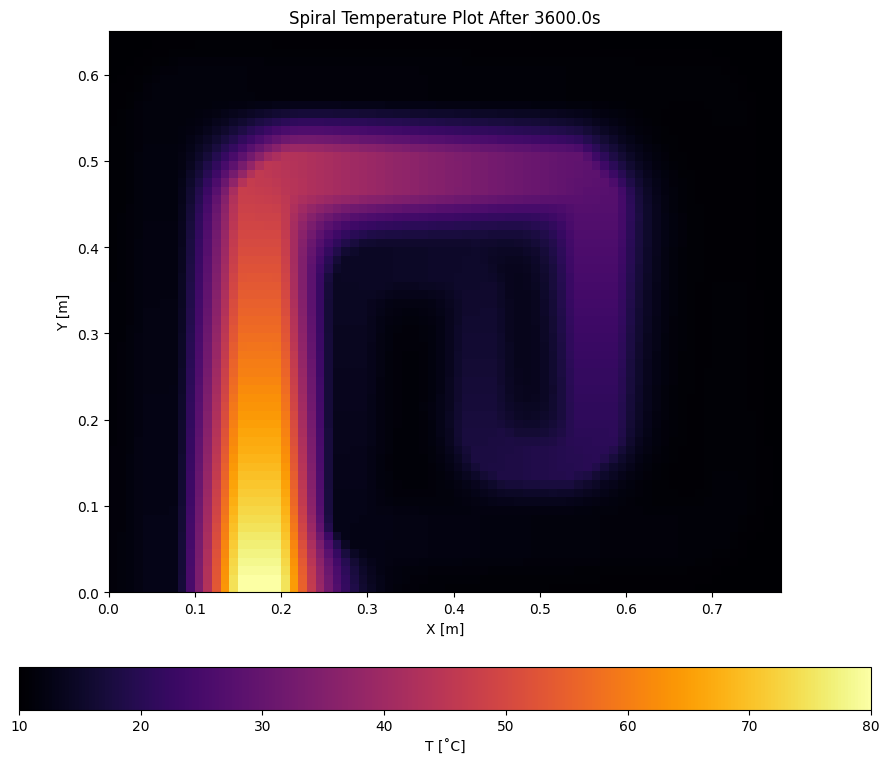

In [15]:
from processing import Mesh
import numpy as np

time = 60*60*1

T_history_matrix = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "matrix_multiplication", time, time/dt)
simulation_time, T = T_history_matrix.popitem()

mesh = Mesh(num_cells_x, num_cells_y, dx, dy)
mesh.show_result(T, f"Spiral Temperature Plot After {simulation_time}s", "T [˚C]", np.min(T_0), np.max(T_0))

## Create a sequence of results, then generate an animation from it.

In [16]:
from processing import create_video_from_sequence
from IPython.display import Video

time = 60*60*1

T_history_matrix = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "matrix_multiplication", time, time/(50*dt))

mesh = Mesh(num_cells_x, num_cells_y, dx, dy)
mesh.save_sequence_of_results(T_history_matrix, f"Spiral Temperature Plot After", "T [˚C]", np.min(T_0), np.max(T_0), "results")

create_video_from_sequence("results", "Spiral_temp_transient.mp4", fps=10)
Video("Spiral_temp_transient.mp4", embed=True)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2700, 2400) to (2704, 2400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
